In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import keras

In [2]:
X, Y = make_circles(n_samples=1000, noise=0.05)

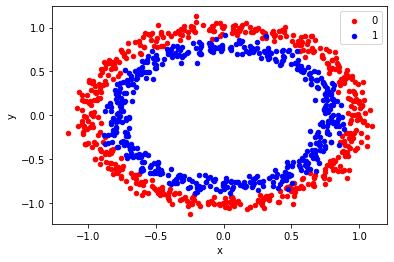

In [3]:
df = pd.DataFrame(dict(x=X[:, 0], y=X[:, 1], label=Y))
colors = {0: 'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [4]:
y = df.iloc[:, 2]
x = df.iloc[:, 0:2]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(900, 2) (100, 2) (900,) (100,)


In [6]:
ann1 = tf.keras.models.Sequential()
ann1.add(tf.keras.layers.Dense(units=8, activation=None))
ann1.add(tf.keras.layers.Dense(units=16, activation=None))
ann1.add(tf.keras.layers.Dense(units=1, activation=None))

In [ ]:
ann1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1 = ann1.fit(x_train, y_train, batch_size=16, epochs=200)

In [8]:
y_pred1 = ann1.predict(x_test)

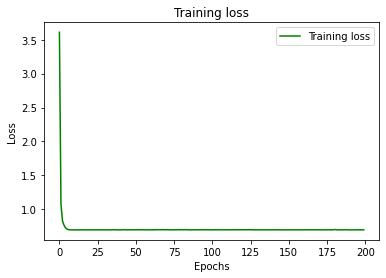

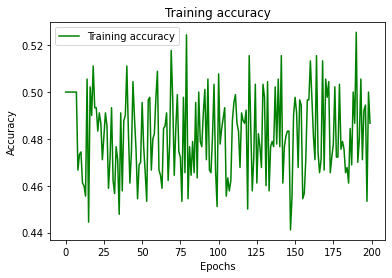

In [9]:
plt.plot(model1.epoch, model1.history["loss"], 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(model1.epoch, model1.history["accuracy"], 'g', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
counter = 0
correct = 0
for i in range(len(y_pred1)):
  if (y_pred1[i][0] <= 0.5 and y_test.values[i]==0) or (y_pred1[i][0] >= 0.5 and y_test.values[i]==1):
    correct += 1
  counter += 1
print(correct/counter)

0.48


در بخش اول مشاهده میکنیم دقت داده های تست 0.48 است
زیرا از هیچ تابع فعالیتی استفاده نکردیم و این باعث میشود شبکه عمیق نداشته باشیم و شبکه ما تبدیل به یک تابع خطی شود

In [ ]:
ann2 = tf.keras.models.Sequential()
ann2.add(tf.keras.layers.Dense(units=8, activation='linear'))
ann2.add(tf.keras.layers.Dense(units=16, activation='linear'))
ann2.add(tf.keras.layers.Dense(units=1, activation='linear'))

ann2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2 = ann2.fit(x_train, y_train, batch_size=16, epochs=200)

y_pred2 = ann2.predict(x_test)

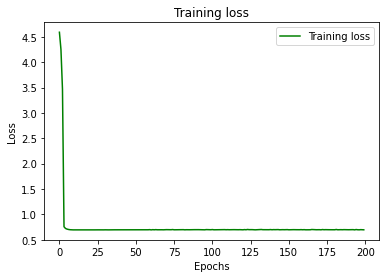

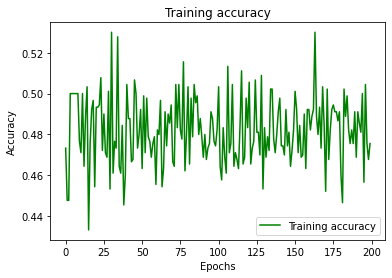

In [12]:
plt.plot(model2.epoch, model2.history["loss"], 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(model2.epoch, model2.history["accuracy"], 'g', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
counter = 0
correct = 0
for i in range(len(y_pred2)):
  if (y_pred2[i][0] <= 0.5 and y_test.values[i]==0) or (y_pred2[i][0] >= 0.5 and y_test.values[i]==1):
    correct += 1
  counter += 1
print(correct/counter)

0.48


در بخش دوم مشاهده میکنیم دقت داده های تست 0.48 است
زیرا از تابع فعالیت خطی استفاده کرده ایم و این باعث میشود شبکه عمیق نداشته باشیم و شبکه ما تبدیل به یک تابع خطی شود

In [ ]:
ann3 = tf.keras.models.Sequential()
ann3.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann2.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann3.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model3 = ann3.fit(x_train, y_train, batch_size=16, epochs=200)

y_pred3 = ann3.predict(x_test)

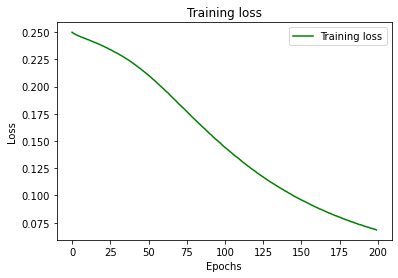

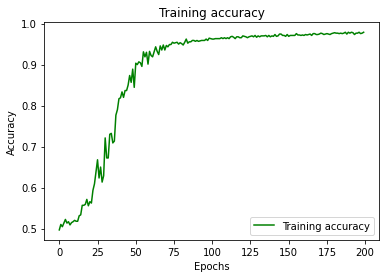

In [15]:
plt.plot(model3.epoch, model3.history["loss"], 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(model3.epoch, model3.history["accuracy"], 'g', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
counter = 0
correct = 0
for i in range(len(y_pred3)):
  if (y_pred3[i][0] <= 0.5 and y_test.values[i]==0) or (y_pred3[i][0] >= 0.5 and y_test.values[i]==1):
    correct += 1
  counter += 1
print(correct/counter)

0.98


در بخش سوم مشاهده میکنیم دقت داده های تست 0.98 است
زیرا از تابع رلو برای لایه های پنهان و از تابع سیگموید برای لایه خروجی استفاده کردیم و این باعث میشود شبکه عمیق داشته باشیم و یادگیری به خوبی انجام شود

برای تابع خطا استفاده کردیم mean_squared همچنین از 

In [ ]:
ann4 = tf.keras.models.Sequential()
ann4.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann4.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4 = ann4.fit(x_train, y_train, batch_size=16, epochs=200)

y_pred4 = ann4.predict(x_test)

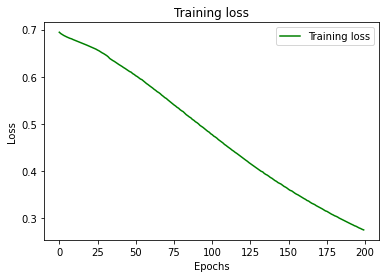

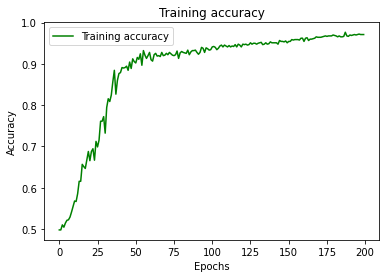

In [18]:
plt.plot(model4.epoch, model4.history["loss"], 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(model4.epoch, model4.history["accuracy"], 'g', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
counter = 0
correct = 0
for i in range(len(y_pred4)):
  if (y_pred4[i][0] <= 0.5 and y_test.values[i]==0) or (y_pred4[i][0] >= 0.5 and y_test.values[i]==1):
    correct += 1
  counter += 1
print(correct/counter)

0.99


در بخش چهارم مشاهده میکنیم دقت داده های تست 0.99 است
زیرا از تابع رلو برای تنها لایه پنهان و از تابع سیگموید برای لایه خروجی استفاده کردیم و این باعث میشود شبکه عمیق داشته باشیم و یادگیری به خوبی انجام شود

In [ ]:
ann5 = tf.keras.models.Sequential()
ann5.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann5.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann5.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model5 = ann5.fit(x_train, y_train, batch_size=16, epochs=200)

y_pred5 = ann5.predict(x_test)

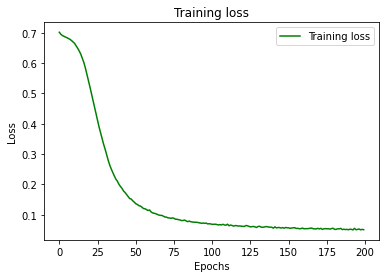

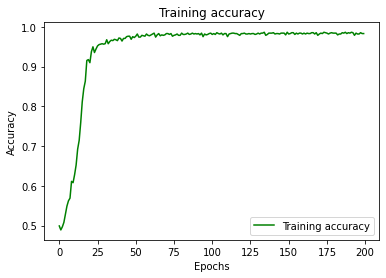

In [26]:
plt.plot(model5.epoch, model5.history["loss"], 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(model5.epoch, model5.history["accuracy"], 'g', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
counter = 0
correct = 0
for i in range(len(y_pred5)):
  if (y_pred5[i][0] <= 0.5 and y_test.values[i]==0) or (y_pred5[i][0] >= 0.5 and y_test.values[i]==1):
    correct += 1
  counter += 1
print(correct/counter)

0.98


در بخش پنجم مشاهده میکنیم دقت داده های تست 0.98 است
زیرا از تابع رلو برای لایه های پنهان و از تابع سیگموید برای لایه خروجی استفاده کردیم و این باعث میشود شبکه عمیق داشته باشیم و یادگیری به خوبی انجام شود
همچنین نسبت به حالت قبلی یک لایه پنهان بیشتر داریم و این باعث میشود   شبکه عمیق تری داشته باشیم و یادگیری بهتر صورت گیرد و مقدار خطای کمتری داشته باشیم

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
optimizer.learning_rate.assign(0.07)

ann6 = tf.keras.models.Sequential()
ann6.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann6.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann6.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann6.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model6 = ann6.fit(x_train, y_train, batch_size=16, epochs=200)

y_pred6 = ann6.predict(x_test)

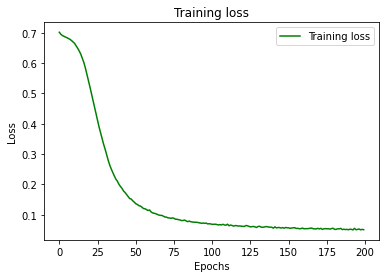

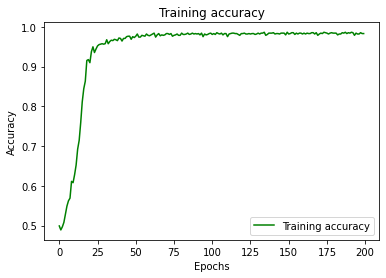

In [31]:
plt.plot(model5.epoch, model5.history["loss"], 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(model5.epoch, model5.history["accuracy"], 'g', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
counter = 0
correct = 0
for i in range(len(y_pred6)):
  if (y_pred6[i][0] <= 0.5 and y_test.values[i]==0) or (y_pred6[i][0] >= 0.5 and y_test.values[i]==1):
    correct += 1
  counter += 1
print(correct/counter)

0.97


در بخش آخر مشاهده میکنیم که با تغییر نرخ یادگیری دقت مدل کاهش یافته است زیرا بهینه ساز آدام نرخ یادگیری بهتری را در نظر گرفته بود و با تغییر نرخ یادگیری دقت مدل کاهش یافت